In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Pfade mechanischer Raumwellen und die terrestrische Brachistochrone

Das Fermatsche Prinzip besagt, dass sich Licht (Wellen) auf dem Weg der kürzesten Laufzeit ausbreitet. 
Für die Ausbreitungsgeschwindigkeit von P- und S-Wellen in elastischen Medien gilt
$c_\mathrm{P}, c_\mathrm{S} \propto \sqrt{G}$.
Für den tiefenabhängigen Schubmodul wird oft die Näherung 
$G\propto z$
verwendet. Somit gilt $c \propto \sqrt{z}$.
Damit ist die Bahnberechnung mathematisch äquivalent zur Brachistochrone, denn für die Geschwindigkeit eines Massenpunkts im Gravitationsfeld gilt ebenfalls 
$v\propto \sqrt{z}$.

Aus dem klassischen Brachistrochronenproblem ist bekannt, dass eine Zykloide die Bahn kürzester Laufzeit ergibt. Nun schauen wir auf die Brachistochrone in Polarkoordinaten.

**TODO Bild**

Die Minimierung des Zeitfunktionals führt auf die Extremalbedingung der Bahn
$\frac{\mathrm{d}r}{\mathrm{d}\theta}=\frac{Rr}{r_0}\sqrt{\frac{r^2-r_0^2}{R^2-r^2}}$, mit $r_0$ als dem kleinsten Radius der berührt wird.

Formal lässt sich diese gewöhnliche Differentialgleichung durch Trennung der Variablen und Integration lösen. Weil sich dabei schwierige Integrale anbahnen, versuchen wir es mit _experimenteller Numerik_. Wir wollen versuchen aus der numerischen Lösung weitere Einsichten zu gewinnen.

## Numerische Lösung der bahnbestimmenden Differentialgleichung

Bevor wir numerisch integrieren, drei Überlegungen vorab
- für $r_0=0$ erwarten wir eine gerade Linie durch den Erdmittelpunkt und für $r>0$ eine Winkeldifferenz $|\theta_A-\theta_B|<\pi$.
- aufgrund der Zeitsymmetrie erwarten wir eine symmetrische Bahn, wobei der tiefste Punkt $r=r_0$ in der Mitte liegt.
- an der Erdoberfläche $r=R$ wird der Anstieg unendlich, das ist nicht problematisch weil die Bahn an der Stelle beendet ist.

Differentialgleichung der terrestrischen Brachistochrone

In [2]:
def tb_ode(r, t):   
    if r0n < r < Rn:
       dr = (Rn*r/r0n)*np.sqrt((r**2 - r0n**2)/(Rn**2 - r**2))
    else:
       dr = 0 
    return dr

Zahlenwerte für eine Beispielrechnung (Index n steht für numerisch, um von symbolischer Rechnung zu unterscheiden)

In [9]:
Rn = 1.0   

Maximal möglicher Winkelbereich vom tiefsten Punkt $r=r_0$ zur Oberfläche $r=R$

In [10]:
theta_grid = np.linspace(0, np.pi/2)   

Numerische Lösung für verschiedene Tiefen

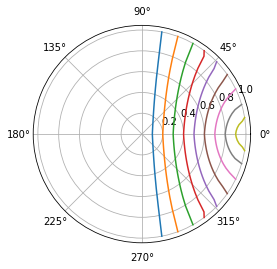

In [12]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
for r0n in np.linspace(0.1, 0.9, 9):
    initial_r = 1.001*r0n  # start slightly above r0, otherwise circle results not reaching the surface
    r_sol = odeint(tb_ode, initial_r, theta_grid) 
    last = np.count_nonzero(r_sol < Rn) + 1  # discard values after reaching the surface
    r_real = r_sol[0:last]
    theta_real = theta_grid[0:last]
    ax.plot(np.concatenate((-np.flip(theta_real), theta_real)), np.concatenate((np.flip(r_real), r_real)))  # symmetry 

## Überprüfen der vermuteten Lösung

Die numerischen Ergebnisse und der Grenzfall der klassischen Brachistochrone $R=\infty$ legen die Vermutung nahe, dass eine Hypozykloide, dass Abrollen eines kleinen Kreises mit Radius $a=\frac{R-r_0}{2}$ auf dem großen Kreis mit Radius $R$ die Lösung sein könnte. Das wollen wir durch symbolische Rechnung überprüfen

In [ ]:
r, r0, R, psi = sp.symbols('r r0 R psi')

Radius des kleinen, abrollenden Kreises

In [ ]:
a = (R-r0)/2

Den Zusammenhang zwischen $\psi$ und $\theta$ liefert die Kreisbahn und die gemeinsame Gegenkathete

In [ ]:
THETA = (a/R)*psi + sp.atan(a*sp.sin(psi)/((R-a) - a*sp.cos(psi)))
d_theta_d_psi_tmp = sp.simplify( THETA.diff(psi) )
display(d_theta_d_psi_tmp)

Nun sollen noch $\cos\psi$ und $\sin^2\psi$ durch $r$ ausgedrückt werden, dabei helfen der Kosinussatz und der trigonometrische Pythagoras

In [ ]:
cospsi = (R**2 + 2*a**2 - 2*R*a - r**2)/(2*(R-a)*a)
sin2psi = 1-cospsi**2

In [ ]:
d_theta_d_psi = sp.simplify( d_theta_d_psi_tmp.subs([ (sp.cos(psi), cospsi), (sp.sin(psi)**2, sin2psi)]) ) 
display(d_theta_d_psi)

Intuitiv liegt es nahe den Kosinussatz
$r^2 = (R-a)^2 + a^2 - 2(R-a)a\cos\psi$
zu differenzieren, aber dann enthält die Ableitung $\frac{\mathrm{d}r}{\mathrm{d}\psi}$ den Term $\sin\psi$. Das ist ungünstig, weil nur $\cos\psi$ als Funktion von $r$ vorliegt (Kosinussatz). Insgesamt ist es einfacher von dem Halbwinkeltheorem $\tan\frac{\psi}{2}=\sqrt{\frac{1-\cos\psi}{1+\cos\psi}}$ auszugehen, darin den Kosinussatz auszuwerten und dann die Ableitung $\frac{\mathrm{d}\psi}{\mathrm{d}r}$ zu berechnen.

In [ ]:
PSI = 2*sp.atan(sp.sqrt((r**2 - r0**2)/(R**2 - r**2)))
d_psi_d_r = sp.simplify( PSI.diff(r) )
display(d_psi_d_r)

Den Ausdruck $r(\theta)$ aufzustellen ist schwierig, aber dessen gesuchte Ableitung erhalten wir durch die Kettenregel $\frac{\mathrm{d}r}{\mathrm{d}\theta} = \frac{\mathrm{d}r}{\mathrm{d}\psi} \frac{\mathrm{d}\psi}{\mathrm{d}\theta}$

In [ ]:
d_r_d_theta = sp.simplify( (1/d_psi_d_r)*(1/d_theta_d_psi) )
display(d_r_d_theta)

Das ist genau die Extremalbedingung der Laufzeit, die vermutete Lösung erweist sich als korrekt.